In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import statsmodels.api as sm

# Data to Vector
from sklearn.preprocessing import LabelEncoder
train_df=pd.read_csv("../input/iothackatorn/IOT_Train.csv")
test_df=pd.read_csv("../input/iothackatorn/IOT_Test.csv")
submit_df=pd.read_csv("../input/iothackatorn/IOT_Submit.csv")

In [2]:
train_df = train_df[train_df['temp'].notna()]
train_df = train_df.reset_index(drop=True)
train_df_y = train_df.temp
train_df.head(3413)

,mac,station_name,tambon_code,tambon_namt,amphur_code,amphur_namt,province_code,province_namt,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,temp
0,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-20 15:00:00+07:00,70.6,59.0,NaN,NaN,0.0,45.0,4.3,32.6
1,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-16 09:00:00+07:00,62.3,76.0,NaN,NaN,0.0,45.0,1.9,37.9
2,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-06-26 19:00:00+07:00,90.3,0.0,NaN,NaN,0.0,135.0,3.2,26.4
3,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-16 04:00:00+07:00,91.7,0.0,NaN,NaN,0.0,157.5,0.0,25.6
4,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-30 08:00:00+07:00,59.1,71.0,NaN,NaN,0.0,180.0,2.3,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,807D3AF57920,บ้านนาสะแบง_2,380704,นาสะแบง,3807,ศรีวิไล,38,บึงกาฬ,18.142499,103.806521,2022-07-27 06:00:00+07:00,76.4,78.0,3.0,1.0,0.0,90.0,0.0,31.7
3409,807D3AF57920,บ้านนาสะแบง_2,380704,นาสะแบง,3807,ศรีวิไล,38,บึงกาฬ,18.142499,103.806521,2022-06-22 09:00:00+07:00,65.6,89.0,2.0,1.0,0.0,0.0,0.0,35.1
3410,807D3AF57920,บ้านนาสะแบง_2,380704,นาสะแบง,3807,ศรีวิไล,38,บึงกาฬ,18.142499,103.806521,2022-05-27 07:00:00+07:00,62.8,91.0,5.0,2.0,0.0,45.0,0.8,37.4
3411,807D3AF57920,บ้านนาสะแบง_2,380704,นาสะแบง,3807,ศรีวิไล,38,บึงกาฬ,18.142499,103.806521,2022-07-28 20:00:00+07:00,77.8,0.0,1.0,0.0,0.0,0.0,0.0,33.0


In [3]:
train_df = train_df.drop(columns=['pm10','pm2.5'])
train_df = train_df.dropna()
train_df = train_df.reset_index(drop=True)
train_df = train_df.apply(LabelEncoder().fit_transform)
train_df.head(3413)

,mac,station_name,tambon_code,tambon_namt,amphur_code,amphur_namt,province_code,province_namt,latitude,longitude,time,humid,light,rainfall,wind_direct,wind_speed,temp
0,5,0,1,0,1,7,1,3,3,4,1911,259,59,0,2,43,141
1,5,0,1,0,1,7,1,3,3,4,345,176,76,0,2,19,194
2,5,0,1,0,1,7,1,3,3,4,1339,456,0,0,6,32,79
3,5,0,1,0,1,7,1,3,3,4,1804,470,0,0,7,0,71
4,5,0,1,0,1,7,1,3,3,4,680,144,71,0,8,23,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,7,1,3,3,3,4,3,5,6,5,2070,317,78,0,4,0,132
3409,7,1,3,3,3,4,3,5,6,5,1233,209,89,0,0,0,166
3410,7,1,3,3,3,4,3,5,6,5,607,181,91,0,2,8,189
3411,7,1,3,3,3,4,3,5,6,5,2108,331,0,0,0,0,145


In [4]:
train_df_y

0        32.6
1        37.9
2        26.4
3        25.6
4        36.2
         ... 
13629    23.5
13630    19.3
13631    24.5
13632    27.3
13633    33.5
Name: temp, Length: 13634, dtype: float64

In [5]:
test_df = test_df.drop(columns=['id','pm10','pm2.5'])
test_df = test_df.dropna()
test_df = test_df.reset_index(drop=True)
test_df.head()

,mac,station_name,tambon_code,tambon_namt,amphur_code,amphur_namt,province_code,province_namt,latitude,longitude,time,humid,light,rainfall,wind_direct,wind_speed
0,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-23 04:00:00+07:00,88.9,1.0,0.0,180.0,2.3
1,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-12 16:00:00+07:00,85.0,40.0,0.3,135.0,1.5
2,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-06-20 03:00:00+07:00,88.9,7.0,0.0,157.5,0.0
3,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-13 13:00:00+07:00,81.9,66.0,0.0,135.0,0.2
4,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-05 09:00:00+07:00,64.9,71.0,0.0,225.0,2.4


In [6]:
test_df = test_df.apply(LabelEncoder().fit_transform)
test_df.head(3413)

,mac,station_name,tambon_code,tambon_namt,amphur_code,amphur_namt,province_code,province_namt,latitude,longitude,time,humid,light,rainfall,wind_direct,wind_speed
0,5,0,1,0,1,7,1,3,3,4,396,399,1,0,8,23
1,5,0,1,0,1,7,1,3,3,4,198,360,40,1,6,15
2,5,0,1,0,1,7,1,3,3,4,978,399,7,0,7,0
3,5,0,1,0,1,7,1,3,3,4,1420,329,66,0,6,2
4,5,0,1,0,1,7,1,3,3,4,1269,159,71,0,10,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,4,7,4,6,4,5,4,6,4,6,671,380,0,0,14,0
3409,4,7,4,6,4,5,4,6,4,6,462,227,81,0,8,31
3410,4,7,4,6,4,5,4,6,4,6,374,375,2,0,0,6
3411,4,7,4,6,4,5,4,6,4,6,1544,475,0,0,0,0


<AxesSubplot:>

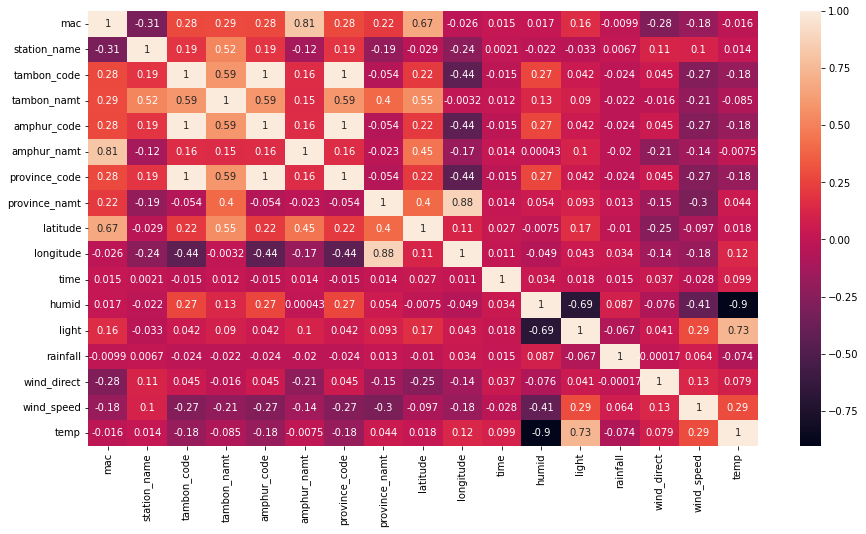

In [7]:
corr = train_df.corr()
f, ax = plt.subplots(figsize=(15, 8))
cmap = sns.diverging_palette(10, 10, as_cmap=True)
sns.heatmap(corr, annot=True)

In [8]:
data_train = train_df.copy()
predictors = ['mac', 'time', 'humid','light', 'rainfall', 'wind_direct', 'wind_speed']
target = 'temp'
data_train_y = data_train.temp

In [9]:
data_train[predictors].head(3413)

,mac,time,humid,light,rainfall,wind_direct,wind_speed
0,5,1911,259,59,0,2,43
1,5,345,176,76,0,2,19
2,5,1339,456,0,0,6,32
3,5,1804,470,0,0,7,0
4,5,680,144,71,0,8,23
...,...,...,...,...,...,...,...
3408,7,2070,317,78,0,4,0
3409,7,1233,209,89,0,0,0
3410,7,607,181,91,0,2,8
3411,7,2108,331,0,0,0,0


In [10]:
final_train = data_train[predictors]
final_train

,mac,time,humid,light,rainfall,wind_direct,wind_speed
0,5,1911,259,59,0,2,43
1,5,345,176,76,0,2,19
2,5,1339,456,0,0,6,32
3,5,1804,470,0,0,7,0
4,5,680,144,71,0,8,23
...,...,...,...,...,...,...,...
13629,4,1033,532,0,36,0,0
13630,4,26,359,0,0,6,29
13631,4,414,432,37,0,2,30
13632,4,1058,452,0,0,14,0


In [11]:
pd.DataFrame(train_df_y)

,temp
0,32.6
1,37.9
2,26.4
3,25.6
4,36.2
...,...
13629,23.5
13630,19.3
13631,24.5
13632,27.3


In [12]:
data_test = test_df.copy()
predictors = ['mac', 'time', 'humid','light', 'rainfall', 'wind_direct', 'wind_speed']

In [13]:
data_test.head()

,mac,station_name,tambon_code,tambon_namt,amphur_code,amphur_namt,province_code,province_namt,latitude,longitude,time,humid,light,rainfall,wind_direct,wind_speed
0,5,0,1,0,1,7,1,3,3,4,396,399,1,0,8,23
1,5,0,1,0,1,7,1,3,3,4,198,360,40,1,6,15
2,5,0,1,0,1,7,1,3,3,4,978,399,7,0,7,0
3,5,0,1,0,1,7,1,3,3,4,1420,329,66,0,6,2
4,5,0,1,0,1,7,1,3,3,4,1269,159,71,0,10,24


In [14]:
final_test = data_test[predictors]
final_test

,mac,time,humid,light,rainfall,wind_direct,wind_speed
0,5,396,399,1,0,8,23
1,5,198,360,40,1,6,15
2,5,978,399,7,0,7,0
3,5,1420,329,66,0,6,2
4,5,1269,159,71,0,10,24
...,...,...,...,...,...,...,...
3408,4,671,380,0,0,14,0
3409,4,462,227,81,0,8,31
3410,4,374,375,2,0,0,6
3411,4,1544,475,0,0,0,0


In [15]:
print(final_train.shape)
print(final_test.shape)

(13634, 7)
(3413, 7)


In [16]:
np.all(np.isfinite(final_train))
np.all(np.isfinite(final_test))

True

In [17]:
final_train.fillna(0, inplace=True)
final_test.fillna(0, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [18]:

from sklearn.metrics import mean_absolute_error as MAE

In [19]:
final_train.head(3413)

,mac,time,humid,light,rainfall,wind_direct,wind_speed
0,5,1911,259,59,0,2,43
1,5,345,176,76,0,2,19
2,5,1339,456,0,0,6,32
3,5,1804,470,0,0,7,0
4,5,680,144,71,0,8,23
...,...,...,...,...,...,...,...
3408,7,2070,317,78,0,4,0
3409,7,1233,209,89,0,0,0
3410,7,607,181,91,0,2,8
3411,7,2108,331,0,0,0,0


In [20]:
print(final_train.shape)


(13634, 7)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(final_train,train_df_y,test_size=0.2,random_state=123)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10907, 7)
(2727, 7)
(10907,)
(2727,)


In [23]:
y_train


2408     24.5
10318    30.5
10009    29.3
2853     27.4
9644     26.5
         ... 
5218     27.5
12252    26.1
1346     33.0
11646    29.6
3582     19.6
Name: temp, Length: 10907, dtype: float64

In [24]:
model = LinearRegression()
model.fit(X_train,y_train)
print("R-squared : ",model.score(X_train,y_train))
print("สัมประสิทธิ์ : ",model.coef_)
print("พยากรณ์ : ",model.predict([[700,600,500,400,300,200,100]]))

y2 = model.predict(X_train).ravel()
train = pd.concat([X_train, y_train], axis='columns')
dc=pd.concat([train.reset_index(), pd.Series(y2, name='พยากรณ์')], axis='columns')
dc.corr()

R-squared :  0.8638543760133829
สัมประสิทธิ์ :  [-1.09316050e-01  8.19672817e-04 -2.78400924e-02  2.81278495e-02
  1.07481259e-02  9.73570175e-05 -1.58055753e-02]
พยากรณ์ :  [-39.07942077]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


,index,mac,time,humid,light,rainfall,wind_direct,wind_speed,temp,พยากรณ์
index,1.000000,-0.305709,0.000074,-0.018091,-0.036148,0.012660,0.112099,0.094510,0.010893,0.015022
mac,-0.305709,1.000000,0.023476,0.016096,0.158506,-0.018583,-0.279101,-0.170240,-0.014165,-0.015240
time,0.000074,0.023476,1.000000,0.034839,0.019586,0.016856,0.029942,-0.032936,0.099533,0.107090
humid,-0.018091,0.016096,0.034839,1.000000,-0.686921,0.088072,-0.079142,-0.412024,-0.902318,-0.970822
light,-0.036148,0.158506,0.019586,-0.686921,1.000000,-0.070712,0.044571,0.294716,0.732372,0.787973
rainfall,0.012660,-0.018583,0.016856,0.088072,-0.070712,1.000000,-0.000442,0.068531,-0.074714,-0.080387
wind_direct,0.112099,-0.279101,0.029942,-0.079142,0.044571,-0.000442,1.000000,0.130420,0.078807,0.084790
wind_speed,0.094510,-0.170240,-0.032936,-0.412024,0.294716,0.068531,0.130420,1.000000,0.292941,0.315181
temp,0.010893,-0.014165,0.099533,-0.902318,0.732372,-0.074714,0.078807,0.292941,1.000000,0.929438
พยากรณ์,0.015022,-0.015240,0.107090,-0.970822,0.787973,-0.080387,0.084790,0.315181,0.929438,1.000000


In [25]:
model.predict([[700,600,500,400,300,200,100],[650,550,450,350,250,150,50],[620,520,420,320,220,120,20]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([-39.07942077, -33.42098516, -30.02592379])

In [26]:
y_temp=model.predict(X_train)
y_temp

array([26.63419174, 27.30320479, 31.06520729, ..., 33.45357487,
       32.5337933 , 24.34051355])

In [27]:
train=pd.concat([X_train,y_train],axis='columns')
train.head()

,mac,time,humid,light,rainfall,wind_direct,wind_speed,temp
2408,7,1950,436,32,0,4,58,24.5
10318,0,183,309,17,14,8,179,30.5
10009,6,1624,308,78,0,6,75,29.3
2853,7,515,407,79,0,6,56,27.4
9644,6,1030,410,0,0,6,0,26.5


In [28]:
dc=pd.concat([train.reset_index(), pd.Series(y_temp, name='predicted')], axis='columns')
dc.head()

,index,mac,time,humid,light,rainfall,wind_direct,wind_speed,temp,predicted
0,2408,7,1950,436,32,0,4,58,24.5,26.634192
1,10318,0,183,309,17,14,8,179,30.5,27.303205
2,10009,6,1624,308,78,0,6,75,29.3,31.065207
3,2853,7,515,407,79,0,6,56,27.4,27.619139
4,9644,6,1030,410,0,0,6,0,26.5,26.730078


In [29]:
y_temp_test=model.predict(X_test)
y_temp_test

array([31.95259724, 33.1568906 , 29.6986127 , ..., 26.4300271 ,
       34.62693508, 34.06882014])

In [30]:
test=pd.concat([X_test, y_test], axis='columns')
test.head()

,mac,time,humid,light,rainfall,wind_direct,wind_speed,temp
12624,4,230,246,43,4,0,10,34.1
4412,1,2099,302,71,0,8,0,32.4
10665,0,67,281,0,0,12,31,27.6
9930,6,493,292,77,0,6,44,29.9
4168,1,1334,203,63,0,6,18,34.2


In [31]:
dt=pd.concat([test.reset_index(), pd.Series(y_temp_test, name='predicted')], axis='columns')
dt.head()

,index,mac,time,humid,light,rainfall,wind_direct,wind_speed,temp,predicted
0,12624,4,230,246,43,4,0,10,34.1,31.952597
1,4412,1,2099,302,71,0,8,0,32.4,33.156891
2,10665,0,67,281,0,0,12,31,27.6,29.698613
3,9930,6,493,292,77,0,6,44,29.9,31.045444
4,4168,1,1334,203,63,0,6,18,34.2,34.776292


In [32]:
from sklearn.tree import DecisionTreeRegressor #import model
model = DecisionTreeRegressor(max_depth=30, #tune parameter
                           min_samples_leaf=10,
                           random_state=500)
model.fit(X_train, y_train)
X_train = X_train.astype(np.float32)

#Predict y(test_data)
y_pred = model.predict(X_test)

In [33]:
y_pred = model.predict(final_test)

In [34]:
predictions1 = pd.DataFrame(y_pred)
predictions1

,0
0,27.390909
1,27.118750
2,27.660000
3,30.875000
4,36.333333
...,...
3408,27.780000
3409,34.284211
3410,27.461538
3411,25.331250


In [35]:
submit1_df = pd.concat([submit_df,predictions1], axis=1)
del submit1_df['temp']
submit1_df.columns = ["id",'temp']
submit1_df

,id,temp
0,1,27.390909
1,2,27.118750
2,3,27.660000
3,4,30.875000
4,5,36.333333
...,...,...
3408,3409,27.780000
3409,3410,34.284211
3410,3411,27.461538
3411,3412,25.331250


In [36]:
predictions = pd.DataFrame(y_temp)
predictions

,0
0,26.634192
1,27.303205
2,31.065207
3,27.619139
4,26.730078
...,...
10902,27.383644
10903,25.274996
10904,33.453575
10905,32.533793


In [37]:
predictions.head(3413)

,0
0,26.634192
1,27.303205
2,31.065207
3,27.619139
4,26.730078
...,...
3408,32.733924
3409,26.593869
3410,25.543832
3411,34.843490


In [38]:
predict=predictions.head(3413)

In [39]:
submit_df = pd.concat([submit_df,predict], axis=1)
del submit_df['temp']
submit_df.columns = ["id",'temp']
submit_df

,id,temp
0,1,26.634192
1,2,27.303205
2,3,31.065207
3,4,27.619139
4,5,26.730078
...,...,...
3408,3409,32.733924
3409,3410,26.593869
3410,3411,25.543832
3411,3412,34.843490


In [40]:
submit_df.to_csv('./submit_iot3.csv',index=False)

In [41]:
submit1_df.to_csv('./submit_iot4.csv',index=False)